Imagem: imgs\Q4\Textura1.png
Média Sobel X: 4.99
Média Sobel Y: 84.33
Padrão detectado: Classe 1 - Variação predominante em Sobel Y (bordas horizontais)
----------------------------------------
Imagem: imgs\Q4\Textura2.png
Média Sobel X: 9.40
Média Sobel Y: 82.93
Padrão detectado: Classe 1 - Variação predominante em Sobel Y (bordas horizontais)
----------------------------------------
Imagem: imgs\Q4\Textura3.png
Média Sobel X: 129.91
Média Sobel Y: 175.24
Padrão detectado: Classe 2
----------------------------------------


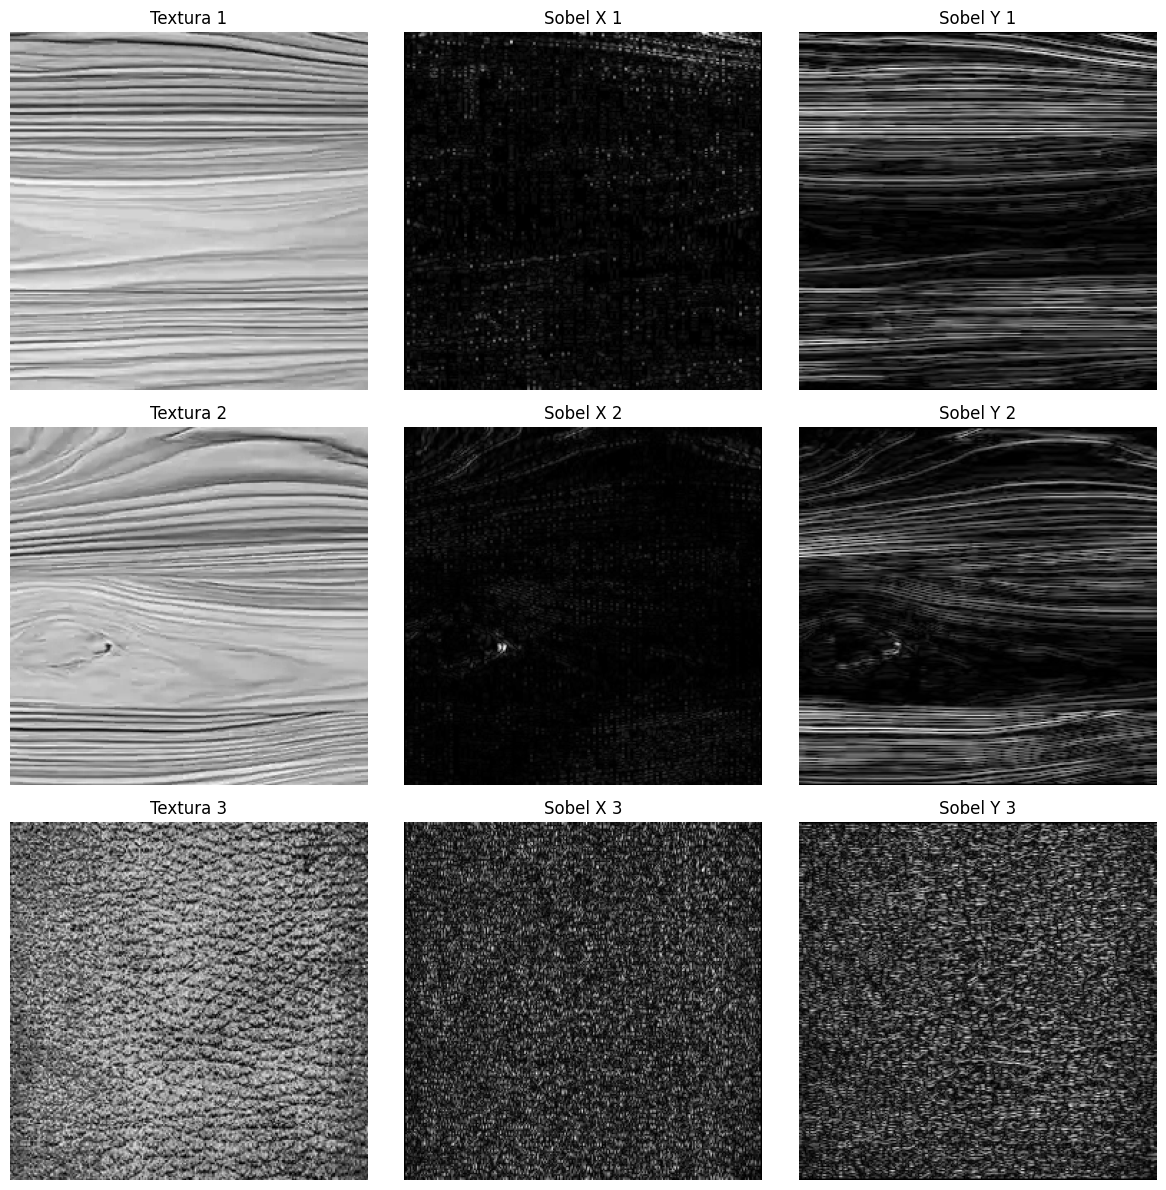

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lista com os caminhos das 3 imagens
imagens = [
    'imgs\\Q4\\Textura1.png',
    'imgs\\Q4\\Textura2.png',
    'imgs\\Q4\\Textura3.png'
]

# Preparar visualização
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, caminho in enumerate(imagens):
    # Carregar a imagem em escala de cinza
    img = cv2.imread(caminho, cv2.IMREAD_GRAYSCALE)

    # Aplicar Sobel X e Y
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # Calcular a média das magnitudes absolutas
    media_sobel_x = np.mean(np.abs(sobel_x))
    media_sobel_y = np.mean(np.abs(sobel_y))

    print(f"Imagem: {caminho}")
    print(f"Média Sobel X: {media_sobel_x:.2f}")
    print(f"Média Sobel Y: {media_sobel_y:.2f}")

    # Definir automaticamente o padrão dominante
    if media_sobel_x > media_sobel_y * 1.8:
        padrao = 'Variação predominante em Sobel X (bordas verticais)'
    elif media_sobel_y > media_sobel_x * 1.8:
        padrao = 'Classe 1 - Variação predominante em Sobel Y (bordas horizontais)'
    else:
        padrao = 'Classe 2'

    print("Padrão detectado:", padrao)
    print('-'*40)

    # Plotar resultados
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title(f'Textura {i+1}')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(np.abs(sobel_x), cmap='gray')
    axes[i, 1].set_title(f'Sobel X {i+1}')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(np.abs(sobel_y), cmap='gray')
    axes[i, 2].set_title(f'Sobel Y {i+1}')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()
